In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
from time import sleep
from tqdm import tqdm, trange

In [3]:
df1 = pd.read_csv("./data/q1.csv")
df2 = pd.read_csv("./data/q2.csv")
df3 = pd.read_csv("./data/q3.csv")
df4 = pd.read_csv("./data/q4.csv")
df5 = pd.read_csv("./data/q5.csv")
df6 = pd.read_csv("./data/q6.csv")
df7 = pd.read_csv("./data/q7.csv")
df8 = pd.read_csv("./data/q8.csv")
df9 = pd.read_csv("./data/q9.csv")
df10 = pd.read_csv("./data/q10.csv")

In [4]:
# Concatenate to single column

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
df = pd.concat(frames)
print(df.shape)
print(df.info())

(30443, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30443 entries, 0 to 3046
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         30443 non-null  int64  
 1   song_id            30443 non-null  object 
 2   chart_position     30443 non-null  int64  
 3   chart_date         30443 non-null  object 
 4   song               30443 non-null  object 
 5   performer          30443 non-null  object 
 6   time_on_chart      30443 non-null  int64  
 7   consecutive_weeks  27315 non-null  float64
 8   worst_position     30443 non-null  int64  
 9   chart_debut        30443 non-null  object 
 10  lyrics             30443 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.8+ MB
None


In [5]:
# Calculate % not found in lyric search
pct_not_found = (sum(df['lyrics'] == 'not found'))/len(df)
print(pct_not_found)

0.07594520907926289


In [ ]:
# EDA showed that there were some weird entries. such as the books beig returned for song lyrics. Who knows why. 

In [6]:
# find the number of lyrics for each song.
res = {}

for i, row in df.iterrows():
    lyric = row['lyrics']
    Id = row['song_id']
    res[Id] = lyric.split(" ")

#Result = pd.DataFrame(res).T
#Result.head()

In [7]:
import string

string.punctuation

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [8]:
df['lyrics_clean'] = df['lyrics'].apply(lambda x: remove_punct(x))

In [9]:
#import regular expression
import re

def tokenize(text):
    tokens = text.split()
    return tokens

df['text_tokenized'] = df['lyrics_clean'].apply(lambda x: tokenize(x.lower()))

In [10]:
df['num_lyrics'] = df['text_tokenized'].apply(lambda x: len(x))

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30443 entries, 0 to 3046
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         30443 non-null  int64  
 1   song_id            30443 non-null  object 
 2   chart_position     30443 non-null  int64  
 3   chart_date         30443 non-null  object 
 4   song               30443 non-null  object 
 5   performer          30443 non-null  object 
 6   time_on_chart      30443 non-null  int64  
 7   consecutive_weeks  27315 non-null  float64
 8   worst_position     30443 non-null  int64  
 9   chart_debut        30443 non-null  object 
 10  lyrics             30443 non-null  object 
 11  lyrics_clean       30443 non-null  object 
 12  text_tokenized     30443 non-null  object 
 13  num_lyrics         30443 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 4.5+ MB


In [19]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [20]:
df.reset_index(inplace=True)

In [22]:
df.drop(columns=["index"], axis=1, inplace=True)

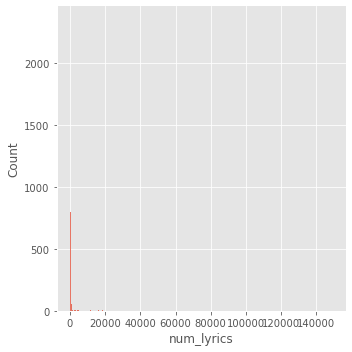

In [24]:
# visualize distribution of num of lyrics

sns.displot(data=df, x="num_lyrics")

In [27]:
sum(df['num_lyrics'] > 1500)

2232

In [84]:
sum(df['num_lyrics'] > 513)

4904

In [28]:
df.drop(df[df['num_lyrics'] > 2000].index, inplace=True)

In [33]:
sum(df['num_lyrics'] == 2)

2312

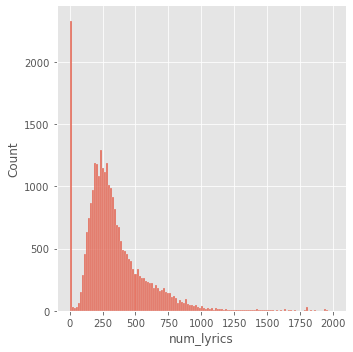

In [29]:
sns.displot(data=df, x="num_lyrics")

In [35]:
sum(df['lyrics'] == "not found")

2312

In [36]:
df.drop(df[df['lyrics'] == 'not found'].index, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26051 entries, 0 to 30442
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   song_id            26051 non-null  object 
 1   chart_position     26051 non-null  int64  
 2   chart_date         26051 non-null  object 
 3   song               26051 non-null  object 
 4   performer          26051 non-null  object 
 5   time_on_chart      26051 non-null  int64  
 6   consecutive_weeks  23300 non-null  float64
 7   worst_position     26051 non-null  int64  
 8   chart_debut        26051 non-null  object 
 9   lyrics             26051 non-null  object 
 10  lyrics_clean       26051 non-null  object 
 11  text_tokenized     26051 non-null  object 
 12  num_lyrics         26051 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 2.8+ MB


In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

In [40]:
sia = SentimentIntensityAnalyzer()

In [41]:
import string

string.punctuation

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [42]:
df['lyrics'] = df['lyrics'].apply(lambda x: remove_punct(x))

In [60]:
df['song_id'] = df['song_id'].apply(lambda x: remove_punct(x))

In [77]:
#import ast
#test['lyrics'] = test["lyrics"].apply(ast.literal_eval).str.decode("utf-8")

In [43]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['lyrics']
    myid = row['song_id']
    res[myid] = sia.polarity_scores(text)

100%|██████████| 26051/26051 [02:18<00:00, 187.89it/s]


In [44]:
Result = pd.DataFrame(res).T

In [45]:
Result.head()

,neg,neu,pos,compound
"""B"" GirlsYoung And Restless",0.017,0.918,0.065,0.9706
"""Joy"" Pt. IIsaac Hayes",0.113,0.776,0.110,-0.2103
#1 Dee JayGoody Goody,0.024,0.929,0.048,0.8957
#1Nelly,0.114,0.759,0.127,-0.1135
#9 DreamJohn Lennon,0.012,0.893,0.095,0.9124


In [46]:
Result = Result.reset_index().rename(columns={'index': 'song_id'})

In [47]:
sentiment_df = Result.merge(df, how='left')

In [ ]:
from pathlib import Path 

filepath = Path('./data/nltk_lyric_sentiment.csv')  
sentiment_df.to_csv(filepath)

In [19]:
df = pd.read_csv("./data/nltk_lyric_sentiment.csv")

In [ ]:
df.head()

In [39]:
df.drop(columns=["Unnamed: 0", 'neg', 'neu', 'pos', 'compound', 'lyrics_clean', 'text_tokenized'], axis=1, inplace=True)

In [85]:
sum(df['num_lyrics'] > 513)

4904

In [88]:
df.drop(df[df['num_lyrics'] > 500].index, inplace=True)

In [20]:
example = "i'll never be your beast of burden. My back is broke, my feet a hurtin' all i want is for you to make love to me"

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

In [22]:
sia = SentimentIntensityAnalyzer()

In [23]:
sia.polarity_scores(example)

{'neg': 0.183, 'neu': 0.641, 'pos': 0.176, 'compound': -0.0516}

In [29]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax
import tensorflow as tf

In [16]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [92]:
df['num_lyrics'].max()

500

In [100]:
df['lyric_char_len'] = pd.Series(dtype='int')

df['lyrics_char_len'] = [len(x) for x in df['lyrics']] 

#for i, row in df.iterrows():
    
 #   text = row['lyrics']
  #  row['lyric_char_len'] = len(text)
   # print(len(text))
    #break

In [102]:
df['lyrics_char_len'].max()

8983

In [106]:
df['lyrics_char_len'].idxmax()

24823

In [124]:
df2 = df.head(3)

In [127]:
df2

,song_id,chart_position,chart_date,song,performer,time_on_chart,consecutive_weeks,worst_position,chart_debut,lyrics,num_lyrics,lyric_char_len,lyrics_char_len
4,#9 DreamJohn Lennon,68,1975-03-08,#9 Dream,John Lennon,12,11.0,68,1974-12-21,9 Dream LyricsVerse 1\nSo long ago\nWas it in ...,206,NaN,1145
5,#BeautifulMariah Carey Featuring Miguel,95,2013-09-07,#Beautiful,Mariah Carey Featuring Miguel,16,15.0,95,2013-05-25,Beautiful LyricsIntro Mariah Carey\nAh ah you’...,292,NaN,1539
6,#SELFIEThe Chainsmokers,95,2014-05-24,#SELFIE,The Chainsmokers,11,10.0,95,2014-03-15,TranslationsPortuguêsEnglishSELFIE LyricsVerse...,365,NaN,1769


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20866 entries, 4 to 26050
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   song_id            20866 non-null  object 
 1   chart_position     20866 non-null  int64  
 2   chart_date         20866 non-null  object 
 3   song               20866 non-null  object 
 4   performer          20866 non-null  object 
 5   time_on_chart      20866 non-null  int64  
 6   consecutive_weeks  19105 non-null  float64
 7   worst_position     20866 non-null  int64  
 8   chart_debut        20866 non-null  object 
 9   lyrics             20866 non-null  object 
 10  num_lyrics         20866 non-null  int64  
 11  lyric_char_len     0 non-null      float64
 12  lyrics_char_len    20866 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 2.7+ MB


In [139]:
var = df['lyrics'][0]
print(var)

KeyError: 0

In [108]:
# Runfor Roberta Model

encoded_text = tokenizer(example, return_tensors='tf')

output = model(**encoded_text)
scores = output[0][0].numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    }
print(scores_dict)

{'roberta_neg': 0.63558716, 'roberta_neu': 0.29613292, 'roberta_pos': 0.06828004}


In [113]:
tokenizer(example2, return_tensors='tf')

{'input_ids': <tf.Tensor: shape=(1, 7309), dtype=int32, numpy=array([[    0, 19163, 48111, ..., 42578,   196,     2]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 7309), dtype=int32, numpy=array([[1, 1, 1, ..., 1, 1, 1]], dtype=int32)>}

In [114]:
len(example2)

8983

In [90]:
encoded_text = tokenizer(example2, return_tensors='tf')

output = model(**encoded_text)
scores = output[0][0].numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    }
print(scores_dict)

{'roberta_neg': 0.18051265, 'roberta_neu': 0.53359777, 'roberta_pos': 0.28588954}


In [32]:
scores

array([0.63558716, 0.29613292, 0.06828004], dtype=float32)

In [146]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='tf')

    
   # def function(**encoded_text):
    #    for i in encoded_text:
     #       print(i, encoded_text[i])
    
    #function(**encoded_text)

    output = model(**encoded_text)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    
    return scores_dict

In [147]:
var = df["lyrics"][7]
#var = "x" * 2400
print(var)
print(len(var))
polarity_scores_roberta(var)

TranslationsPortuguêsthatPOWER LyricsInstrumental Intro

PreChorus Justin Bieber
And oh Im alive Im alive Im alive
And oh I can fly I can fly I can fly
And oh Im alive Im alive Im alive
And Im lovin every second minute hour
Bigger better stronger power

Chorus william william  Justin Bieber
I got that power
I got that power
I got that power
Power power power

Verse 1 william
They call me WillA stay so cool Im chilly
I done made that milli on my way to that billi
Used to have a piggy bank but now I got that bigger bank
Whowho cares what the haters think
They hatin on me cause Im doin what they cant
I stay on that hustle I flex that mental muscle
Hate to bust your bubble Im on that other level

Refrain william
Ima take it higher and high high and higher
I stay in fly attire
Keep burnin like that fire
You might also likePreChorus Justin Bieber
And oh Im alive Im alive Im alive
And oh I can fly I can fly I can fly
And oh Im alive Im alive Im alive
And Im lovin every second minute hour
Bigg

InvalidArgumentError: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather]

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 613), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 613), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [142]:
res = {}

for i, row in tqdm(df.iterrows(), total=len(df2)):
    text = row['lyrics']
    Id = row['song_id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    print(i)
    print("--")
    roberta_result = polarity_scores_roberta(text)
    #both = {**vader_result_rename, **roberta_result}
    #res[Id] = both
    #if len(vader_result_rename) != len(roberta_result):
     #   print('not similar')
      #  break

  0%|          | 0/3 [00:00<?, ?it/s]

4
--


 33%|███▎      | 1/3 [00:12<00:25, 12.51s/it]

5
--


 67%|██████▋   | 2/3 [00:19<00:09,  9.54s/it]

6
--


100%|██████████| 3/3 [00:26<00:00,  8.97s/it]


7
--


InvalidArgumentError: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather]

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 613), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 613), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [ ]:
# try try and catch

In [48]:
Result = pd.DataFrame(res).T
#sentiment_df = Result.merge(df, right_on = 'song_id')

In [51]:
df.head()

,song_id,chart_position,chart_date,song,performer,time_on_chart,consecutive_weeks,worst_position,chart_debut,lyrics,num_lyrics
0,"""B"" GirlsYoung And Restless",91,1990-08-11,"""B"" Girls",Young And Restless,15,14.0,91,1990-05-05,“B” Girls LyricsIntro\nHey Slim Come here chec...,551
1,"""Joy"" Pt. IIsaac Hayes",72,1974-02-16,"""Joy"" Pt. I",Isaac Hayes,9,8.0,72,1973-12-22,1212 Songs LyricsAAlex Turner Stuck on the Pu...,857
2,#1 Dee JayGoody Goody,99,1978-12-16,#1 Dee Jay,Goody Goody,5,4.0,99,1978-11-18,Lbo3d l’akhar LyricsVerse 1 Omar Cravate\n\nBa...,577
3,#1Nelly,75,2002-03-02,#1,Nelly,20,19.0,75,2001-10-20,1 LyricsIntro\nUh uh uh\nI just gotta bring it...,723
4,#9 DreamJohn Lennon,68,1975-03-08,#9 Dream,John Lennon,12,11.0,68,1974-12-21,9 Dream LyricsVerse 1\nSo long ago\nWas it in ...,206


In [49]:
Result.head()

,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
"""B"" GirlsYoung And Restless",0.017,0.918,0.065,0.9706,0.635587,0.296133,0.06828
"""Joy"" Pt. IIsaac Hayes",0.113,0.776,0.110,-0.2103,0.635587,0.296133,0.06828
#1 Dee JayGoody Goody,0.024,0.929,0.048,0.8957,0.635587,0.296133,0.06828
#1Nelly,0.114,0.759,0.127,-0.1135,0.635587,0.296133,0.06828
#9 DreamJohn Lennon,0.012,0.893,0.095,0.9124,0.635587,0.296133,0.06828


In [43]:
from pathlib import Path 

filepath = Path('./data/nltk_roberta_lyric_sentiment.csv')  
sentiment_df.to_csv(filepath)

NameError: name 'sentiment_df' is not defined